In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import filedialog
from matplotlib.colors import LinearSegmentedColormap
import os

In [134]:
# Create a Tkinter root window (this will not be shown)
root = tk.Tk()
root.withdraw()

# Ask the user to select the first CSV file
csv_file1 = filedialog.askopenfilename(title="Select the first CSV file", filetypes=[("CSV files", "*.csv")])

# Ask the user to select the second CSV file
csv_file2 = filedialog.askopenfilename(title="Select the second CSV file", filetypes=[("CSV files", "*.csv")])

In [135]:
# Get the directory path for the selected files
path = os.path.dirname(csv_file1)
path_1 = path.split('/')[:-1]
directory_path='/'.join(path.split('/')[:-1])
Animal_name= path_1[-1]
print(path_1)
print(directory_path)
print(Animal_name)


['', 'Users', 'kaycei', 'K on Server (NoMachine)', 'KayCei', 'HDC', 'AH4-KO']
/Users/kaycei/K on Server (NoMachine)/KayCei/HDC/AH4-KO
AH4-KO


Column names in DataFrame 1:
Index(['Current Behavior Label', 'Previous Behavior Label', 'Count'], dtype='object')

Column names in DataFrame 2:
Index(['Current Behavior Label', 'Previous Behavior Label', 'Count'], dtype='object')
    Current Behavior Label Previous Behavior Label  Count_1  Count_2
0        Contra-Body Groom             Contra-Itch     13.0     73.0
1        Contra-Body Groom           Contra-Orient      5.0     15.0
2        Contra-Body Groom       Face Groom Type 1      1.0      NaN
3        Contra-Body Groom              Head Groom      1.0      1.0
4        Contra-Body Groom      Investigate Type 1      NaN      1.0
..                     ...                     ...      ...      ...
198                   Rear      Investigate Type 1      8.0      8.0
199                   Rear      Investigate Type 2     39.0    129.0
200                   Rear        Ipsi-Itch Type 1      2.0      2.0
201                   Rear             Ipsi-Orient     10.0     11.0
202       

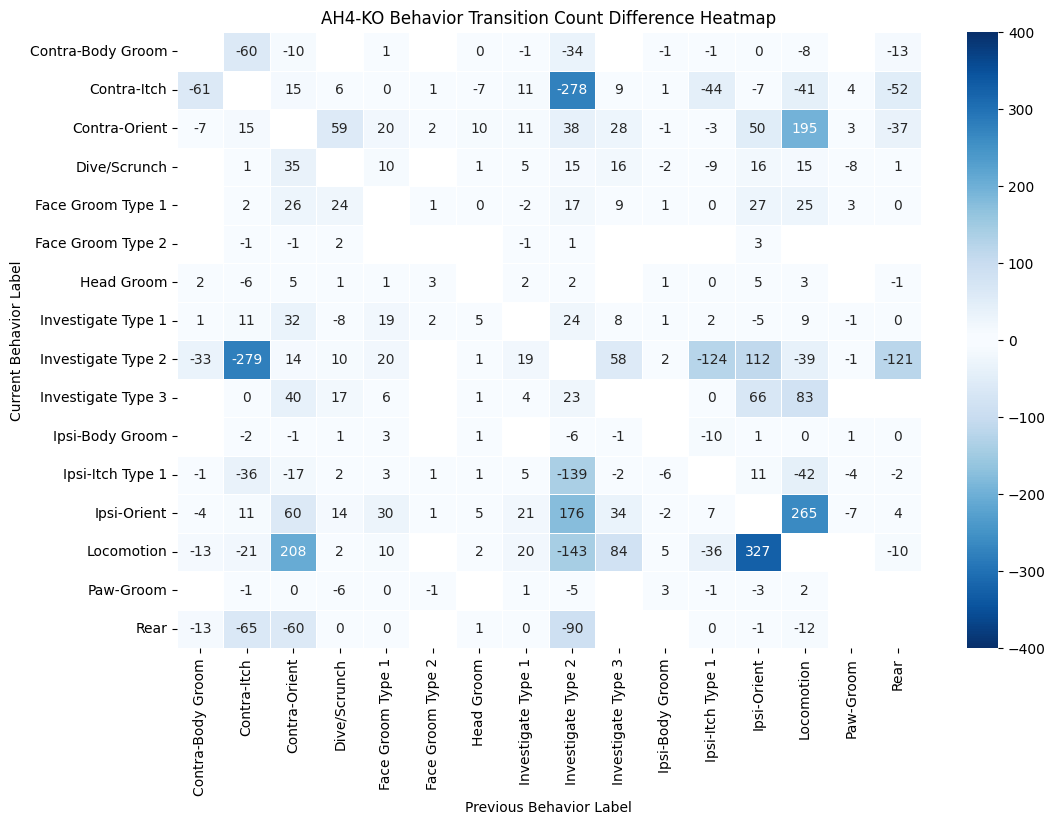

In [137]:
# Check if the user canceled file selection
if not csv_file1 or not csv_file2:
    print("File selection canceled.")
else:
    # Load the selected CSV files into pandas DataFrames
    df1 = pd.read_csv(csv_file1, sep=',')
    df2 = pd.read_csv(csv_file2, sep=',')
    
    # Display the column names for each DataFrame
    print("Column names in DataFrame 1:")
    print(df1.columns)

    print("\nColumn names in DataFrame 2:")
    print(df2.columns)

    ## Merge the two DataFrames based on the behavior labels
    merged_df = pd.merge(df1, df2, on=['Current Behavior Label', 'Previous Behavior Label'], suffixes=('_1', '_2'), how='outer')
    print(merged_df)
    # Calculate the difference by subtracting counts_2 from counts_1
    merged_df['Count Difference'] = merged_df['Count_1'].fillna(0) - merged_df['Count_2'].fillna(0)

    # Calculate the minimum and maximum values of the "Count Difference" column
    min_value = merged_df['Count Difference'].min()
    print(min_value)
    max_value = merged_df['Count Difference'].max()
    print(max_value)
    
    # Calculate the midpoint for the color scales
    midpoint_min = min_value *.50
    print(midpoint_min)
    midpoint_max= max_value*.50
    print(midpoint_max)

    # Create custom colormaps for negative values starting at 50% of min_value
    vivid_colors = plt.get_cmap('Blues_r')(np.linspace(0, 1, 30))  # Vivid colors for negative values

    # Create custom colormaps for positive values starting at 50% of max_value
    turbo_colors = plt.get_cmap('Blues')(np.linspace(0, 1, 30))  # Turbo colors for positive values

    # Combine the two colormaps into a single colormap
    custom_cmap = LinearSegmentedColormap.from_list('custom_color_scale', np.vstack((vivid_colors, turbo_colors)), N=256)


    # Combine the two colormaps into a single colormap
    custom_cmap = LinearSegmentedColormap.from_list('custom_color_scale', np.vstack((vivid_colors, turbo_colors)), N=256)

    # Pivot the DataFrame to create a matrix for the heatmap
    heatmap_data = merged_df.pivot(index='Current Behavior Label', columns='Previous Behavior Label', values='Count Difference')

     # Save the heatmap under the directory with the variable Animal_name Transition Difference
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap=custom_cmap, annot=True, fmt='g', linewidths=.5, cbar=True, vmin=-400, vmax=400)
    plt.title(f'{Animal_name} Behavior Transition Count Difference Heatmap')
    plt.xlabel('Previous Behavior Label')
    plt.ylabel('Current Behavior Label')
    plt.savefig(f"{directory_path}/{Animal_name}_Transition_Difference_Heatmap.png")
    plt.show()

In [87]:
y=max_value - midpoint_max
print(y)

125.39999999999999
